1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


TypeError: Invalid shape (148, 270, 7) for image data

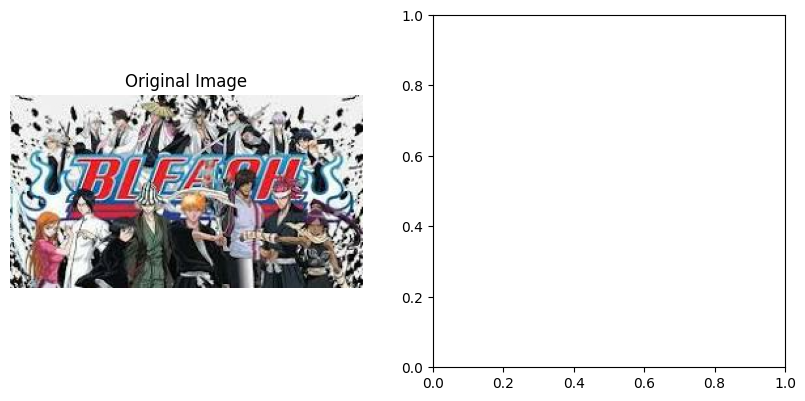

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load a pre-trained DeepLabV3+ model with MobileNetV2 backbone
model = tf.keras.applications.DenseNet201(input_shape=(None, None, 3), include_top=False)

# Pre-process the image
def preprocess_image(image):
    # Resize image to 224x224 (or appropriate input size for the model)
    image_resized = tf.image.resize(image, (224, 224))

    # Normalize the image to the [0, 1] range
    image_resized = image_resized / 255.0

    # Add an extra batch dimension (for batch processing)
    image_batch = tf.expand_dims(image_resized, axis=0)

    return image_batch

# Load an example image for segmentation
image_path = 'download.jpg'  # Replace with your image path
image = tf.io.read_file(image_path)
image = tf.image.decode_jpeg(image, channels=3)
image = tf.cast(image, tf.float32)

# Pre-process the image
image_batch = preprocess_image(image)

# Make predictions with the model
predictions = model.predict(image_batch)

# The model's output is a 4D tensor (batch_size, height, width, channels)
# We need to select the class with the highest probability for each pixel
segmentation_mask = tf.argmax(predictions, axis=-1)

# Resize the mask to the original image size (assuming the original size is 224x224)
segmentation_mask_resized = tf.image.resize(segmentation_mask, (image.shape[0], image.shape[1]))

# Convert the result to a numpy array
segmentation_mask_resized = segmentation_mask_resized.numpy()

# Visualize the segmentation result
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image / 255.0)  # Image needs to be normalized
plt.title("Original Image")
plt.axis('off')

# Segmentation mask
plt.subplot(1, 2, 2)
plt.imshow(segmentation_mask_resized, cmap='tab10')  # 'tab10' colormap for multi-class segmentation
plt.title("Segmentation Mask")
plt.axis('off')

plt.show()


<ipython-input-16-05853a41fa61>:5: DeprecationWarning: Please import `distance_transform_edt` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.morphology import distance_transform_edt  # Correct import for distance transform from scipy


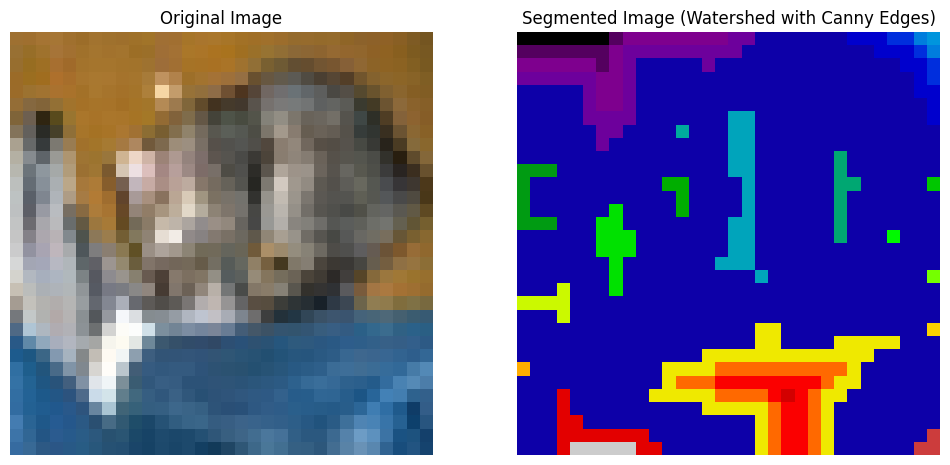

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from skimage import color, measure, segmentation, feature
from scipy.ndimage.morphology import distance_transform_edt  # Correct import for distance transform from scipy

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize CIFAR-10 images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Select a sample image from the test set
sample_image = x_test[0]

# Convert to grayscale
sample_image_gray = color.rgb2gray(sample_image)

# Step 1: Apply Canny edge detection to highlight boundaries
edges = feature.canny(sample_image_gray)

# Step 2: Generate markers for watershed algorithm (distance transform on the edges)
# First, we perform a dilation of edges to make sure markers are prominent
distance = distance_transform_edt(~edges)  # Invert edges before distance transform

# Step 3: Apply watershed segmentation
markers = measure.label(distance)
segmentation_result = segmentation.watershed(-distance, markers)

# Visualize the results
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title("Original Image")
plt.axis('off')

# Segmentation result
plt.subplot(1, 2, 2)
plt.imshow(segmentation_result, cmap='nipy_spectral')
plt.title("Segmented Image (Watershed with Canny Edges)")
plt.axis('off')

plt.show()


<ipython-input-18-4f09e6526000>:4: DeprecationWarning: Please import `distance_transform_edt` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.morphology import distance_transform_edt  # Correct import for distance transform from scipy


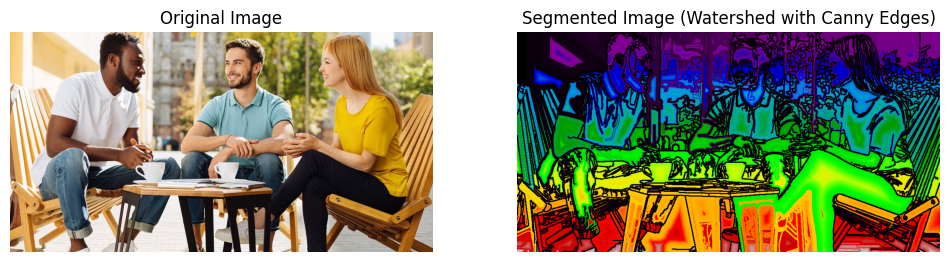

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, measure, segmentation, feature
from scipy.ndimage.morphology import distance_transform_edt  # Correct import for distance transform from scipy
from skimage.io import imread  # To read the custom image

# Load your custom image (replace with the path to your image)
image_path = 'hello1.jpg'  # Change this to your image file path
sample_image = imread(image_path)

# If the image is RGB, convert it to grayscale for segmentation
sample_image_gray = color.rgb2gray(sample_image)

# Step 1: Apply Canny edge detection to highlight boundaries
edges = feature.canny(sample_image_gray)

# Step 2: Generate markers for watershed algorithm (distance transform on the edges)
# First, we perform a dilation of edges to make sure markers are prominent
distance = distance_transform_edt(~edges)  # Invert edges before distance transform

# Step 3: Apply watershed segmentation
markers = measure.label(distance)
segmentation_result = segmentation.watershed(-distance, markers)

# Visualize the results
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title("Original Image")
plt.axis('off')

# Segmentation result
plt.subplot(1, 2, 2)
plt.imshow(segmentation_result, cmap='nipy_spectral')
plt.title("Segmented Image (Watershed with Canny Edges)")
plt.axis('off')

plt.show()
